## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
clean_df = application_df.drop(columns=["EIN","NAME"])
clean_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
for col in clean_df:
    print(([col, clean_df[col].nunique()]))

['APPLICATION_TYPE', 17]
['AFFILIATION', 6]
['CLASSIFICATION', 71]
['USE_CASE', 5]
['ORGANIZATION', 4]
['STATUS', 2]
['INCOME_AMT', 9]
['SPECIAL_CONSIDERATIONS', 2]
['ASK_AMT', 8747]
['IS_SUCCESSFUL', 2]


In [8]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
app_cat = clean_df.dtypes.index.tolist()
clean_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# app_type_count = clean_df['APPLICATION_TYPE'].value_counts()
# app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_type_count = clean_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# application_types_to_replace = list(app_type_count[app_type_count < 500].index)
# # Replace in dataframe
# for app in application_types_to_replace:
#     clean_df['APPLICATION_TYPE'] = clean_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
# clean_df['APPLICATION_TYPE'].value_counts()

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(app_type_count[app_type_count < 500].index)
# Replace in dataframe
for app in application_types_to_replace:
    clean_df['APPLICATION_TYPE'] = clean_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
clean_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [21]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_count = clean_df['CLASSIFICATION'].value_counts()
class_count.head(25)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
Name: CLASSIFICATION, dtype: int64

In [22]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(class_count[class_count < 300].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [25]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
numeric_apps_df = pd.get_dummies(clean_df)
numeric_apps_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# Split our preprocessed data into our features and target arrays
y = numeric_app_df["IS_SUCCESSFUL"]
X = numeric_app_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

First attempt

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_1 = 6
hidden_nodes_2 = 12
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 654       
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="Adamax", metrics=["accuracy"])

In [31]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=125)

Epoch 1/125
804/804 [==============================] - 1s 980us/step - loss: 0.6349 - accuracy: 0.6711
Epoch 2/125
804/804 [==============================] - 1s 966us/step - loss: 0.5847 - accuracy: 0.7135
Epoch 3/125
804/804 [==============================] - 1s 982us/step - loss: 0.5717 - accuracy: 0.7211
Epoch 4/125
804/804 [==============================] - 1s 994us/step - loss: 0.5653 - accuracy: 0.7257
Epoch 5/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.7279
Epoch 6/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7285
Epoch 7/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5581 - accuracy: 0.7293
Epoch 8/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5569 - accuracy: 0.7286
Epoch 9/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7285
Epoch 10/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 

804/804 [==============================] - 1s 960us/step - loss: 0.5439 - accuracy: 0.7340
Epoch 81/125
804/804 [==============================] - 1s 946us/step - loss: 0.5438 - accuracy: 0.7337
Epoch 82/125
804/804 [==============================] - 1s 967us/step - loss: 0.5438 - accuracy: 0.7335
Epoch 83/125
804/804 [==============================] - 1s 976us/step - loss: 0.5439 - accuracy: 0.7334
Epoch 84/125
804/804 [==============================] - 1s 968us/step - loss: 0.5435 - accuracy: 0.7338
Epoch 85/125
804/804 [==============================] - 1s 968us/step - loss: 0.5437 - accuracy: 0.7324
Epoch 86/125
804/804 [==============================] - 1s 973us/step - loss: 0.5434 - accuracy: 0.7333
Epoch 87/125
804/804 [==============================] - 1s 969us/step - loss: 0.5436 - accuracy: 0.7334
Epoch 88/125
804/804 [==============================] - 1s 972us/step - loss: 0.5435 - accuracy: 0.7332
Epoch 89/125
804/804 [==============================] - 1s 978us/step - loss:

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5520 - accuracy: 0.7321 - 485ms/epoch - 2ms/step
Loss: 0.5520379543304443, Accuracy: 0.7321282625198364


<AxesSubplot:>

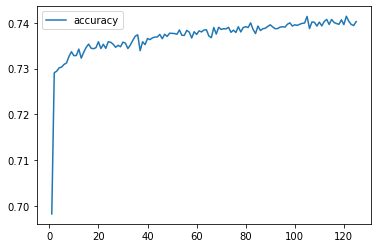

In [39]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

Attempt 2

In [34]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_11 = 12
hidden_nodes_12 = 18
nn1 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn1.add(tf.keras.layers.Dense(units=hidden_nodes_11, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn1.add(tf.keras.layers.Dense(units=hidden_nodes_12, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE

nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                1308      
                                                                 
 dense_7 (Dense)             (None, 18)                234       
                                                                 
 dense_8 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
#  YOUR CODE GOES HERE
nn1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [49]:
# Train the model
#  YOUR CODE GOES HERE
fit_model1 = nn1.fit(X_train_scaled,y_train,epochs=125)

Epoch 1/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7420
Epoch 2/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7418
Epoch 3/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7415
Epoch 4/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7418
Epoch 5/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7418
Epoch 6/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7418
Epoch 7/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7423
Epoch 8/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7408
Epoch 9/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7418
Epoch 10/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7423
Epoch 82/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7420
Epoch 83/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7421
Epoch 84/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7418
Epoch 85/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7414
Epoch 86/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7422
Epoch 87/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7417
Epoch 88/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7417
Epoch 89/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7423
Epoch 90/125
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 

In [50]:
model_loss1, model_accuracy1 = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss1}, Accuracy: {model_accuracy1}")

268/268 - 0s - loss: 0.5571 - accuracy: 0.7273 - 327ms/epoch - 1ms/step
Loss: 0.5571486353874207, Accuracy: 0.7273469567298889


<AxesSubplot:>

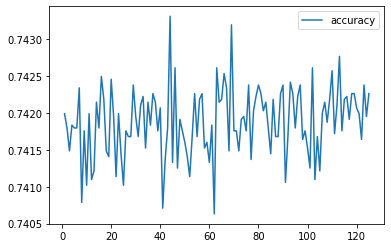

In [56]:
# plotting the accuracy
history_df1 = pd.DataFrame(fit_model1.history, index = range(1, len(fit_model1.history['loss'])+1))
history_df1.plot(y = 'accuracy')

Attempt 3

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_21 = 6
hidden_nodes_22 = 12
hidden_nodes_23 = 18

nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=hidden_nodes_21, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=hidden_nodes_22, activation="relu"))

# third hidden layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=hidden_nodes_23, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6)                 654       
                                                                 
 dense_14 (Dense)            (None, 12)                84        
                                                                 
 dense_15 (Dense)            (None, 18)                234       
                                                                 
 dense_16 (Dense)            (None, 1)                 19        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Compile the model
#  YOUR CODE GOES HERE
nn2.compile(loss="binary_crossentropy", optimizer="Ftrl", metrics=["accuracy"])

In [60]:
# Train the model
#  YOUR CODE GOES HERE
fit_model2 = nn2.fit(X_train_scaled,y_train,epochs=125)

Epoch 1/125
804/804 [==============================] - 2s 1ms/step - loss: 0.6928 - accuracy: 0.5315
Epoch 2/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6926 - accuracy: 0.5318
Epoch 3/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5318
Epoch 4/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5318
Epoch 5/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5318
Epoch 6/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6922 - accuracy: 0.5318
Epoch 7/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5318
Epoch 8/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5318
Epoch 9/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5318
Epoch 10/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6919 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5318
Epoch 82/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 83/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 84/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 85/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 86/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 87/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 88/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 89/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5318
Epoch 90/125
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 

In [61]:
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")

268/268 - 1s - loss: 0.6909 - accuracy: 0.5343 - 508ms/epoch - 2ms/step
Loss: 0.6909106373786926, Accuracy: 0.5343440175056458


<AxesSubplot:>

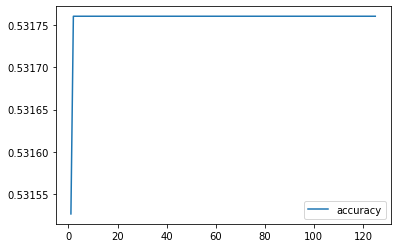

In [62]:
# plotting the accuracy
history_df2 = pd.DataFrame(fit_model2.history, index = range(1, len(fit_model2.history['loss'])+1))
history_df2.plot(y = 'accuracy')

Attempt 4

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_31 = 12
hidden_nodes_32 = 18
hidden_nodes_33 = 24

nn3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=hidden_nodes_31, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=hidden_nodes_32, activation="relu"))

# third hidden layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=hidden_nodes_33, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE

nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                1308      
                                                                 
 dense_18 (Dense)            (None, 18)                234       
                                                                 
 dense_19 (Dense)            (None, 24)                456       
                                                                 
 dense_20 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,023
Trainable params: 2,023
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the model
#  YOUR CODE GOES HERE
nn3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [66]:
# Train the model
#  YOUR CODE GOES HERE
fit_model3 = nn3.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7390
Epoch 2/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7402
Epoch 3/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7399
Epoch 4/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7390
Epoch 5/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7407
Epoch 6/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7400
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7405
Epoch 8/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7400
Epoch 9/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7393
Epoch 10/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7406
Epoch 82/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7403
Epoch 83/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7407
Epoch 84/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7405
Epoch 85/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7401
Epoch 86/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7407
Epoch 87/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7411
Epoch 88/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7414
Epoch 89/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7420
Epoch 90/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 

In [67]:
model_loss3, model_accuracy3 = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

268/268 - 0s - loss: 0.5561 - accuracy: 0.7249 - 467ms/epoch - 2ms/step
Loss: 0.5560698509216309, Accuracy: 0.7248979806900024


<AxesSubplot:>

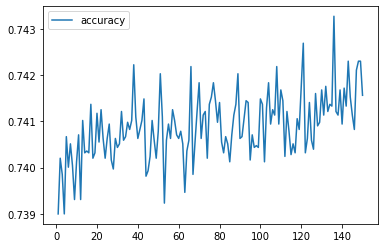

In [68]:
# plotting the accuracy
history_df3 = pd.DataFrame(fit_model3.history, index = range(1, len(fit_model3.history['loss'])+1))
history_df3.plot(y = 'accuracy')

In [69]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn3.save('Models/AlphabetSoupCharity1.h5')